#### Predicting Property value
Number of Instances: 92508

Number of Attributes: 16 (including the target variable)

Attribute Information:

| Column Name                | Description                                                                                                                                      | Type        |
|----------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|-------------|
| TOTAL VALUE                | The combined assessed value of the land and improvements on the parcel                                                                           | Number      |
| FRONT                      | The width of the front of property (in feet)                                                                                                     | Number      |
| DEPTH                      | The depth of the property (in feet)                                                                                                              | Number      |
| PROPERTY CLASS             | Property Type Classification Codes describe the primary use of each parcel of real property on the assessment roll                               | Number      |
| LAND VALUE                 | The assessed value of the land                                                                                                                   | Number      |
| SALE PRICE                 | The price that the parcel of real property was last sold for                                                                                     | Number      |
| YEAR BUILT                 | The year the primary building on the parcel was built                                                                                            | Number      |
| TOTAL LIVING AREA          | The amount of living space (in square feet)                                                                                                      | Number      |
| OVERALL CONDITION          | A grade of the condition of the property                                                                                                         | Number      |
| BUILDING STYLE             | A code for the style of building                                                                                                                 | Number      |
| HEAT TYPE                  | The type of heating system in the building (only applicable to residential properties)                                                           | Number      |
| BASEMENT TYPE              | The type of basement on the property (only applicable to residential properties)                                                                 | Number      |
| # OF STORIES               | The number of floors/Stories in the property                                                                                                     | Number      |
| # OF FIREPLACES            | The number of fireplaces in a dwelling (only applicable to residential properties)                                                               | Number      |
| # OF BEDS                  | The number of beds in a dwelling (only applicable to residential properties)                                                                     | Number      |
| # OF BATHS                 | The number of baths in a dwelling (only applicable to residential properties)                                                                    | Number      |
| # OF KITCHENS              | The number of kitchens in a dwelling (only applicable to residential properties)                                                                 | Number      |



There are no missing Attribute Values.

Implementing a Linear Regression Model to predict the TOTAL VALUE of a property

In [ ]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

#### STEP 1 - Load Data

In [ ]:
# loads csv file into pandas dataframe
df = pd.read_csv('data.csv', dtype=np.float64)

#To shuffle the data 
df = df.sample(frac = 1)

In [ ]:
# takes out total value column (target) and flattens it as as numpy array
y = np.asarray(df['TOTAL VALUE'] )
y = y.reshape(y.shape[0],1)
# converts column names to a list and removes target column
feature_cols = df.columns.to_list()
feature_cols.remove('TOTAL VALUE')
# indexes the dataframe to get just the feature columns then turns it into a numpy array
x = np.asarray(df[feature_cols])

Variable **y** contains the total values of the property

Variable **x** contains the features

In [ ]:
#STEP 2
#creating a train-test split of 80-20 
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2,random_state = 5)
#Further dividing train to 70-10 train-validation
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size = 0.125,random_state = 5)
#Checking for dimensions
print('X_train = ',X_train.shape)
print('X_test = ',X_test.shape)
print('X_val = ',X_val.shape)

X_train =  (64755, 15)
X_test =  (18502, 15)
X_val =  (9251, 15)


In [ ]:
#STEP 3
#Function for scaling
def scaler(X):
  return (X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

#Scale the features
X_train_s = scaler(X_train)
X_test_s = scaler(X_test)
X_val_s = scaler(X_val)

#Scale the targets
Y_train_s = scaler(Y_train)
Y_test_s = scaler(Y_test)
Y_val_s = scaler(Y_val)


In [ ]:
#STEP 4
#Initialising random weights to 16 weight parameters

import random
#seed value to reproduce random numbers 
np.random.seed(100)

#Initialise an empty numpy array
w = np.zeros(16)

#initialise random numbers.As random creates values between 0-1 and weights can be more than 0-1, start with higher weights.
w = np.random.rand(16,1)*1000

#After trail and error , optimal values for epoch and learning rate were found as follows
epoch = 50
rate = 0.17

In [ ]:
# STEP 5
#Find the size of train and validatoin set 
n_train,c = X_train_s.shape
n_val,c = X_val_s.shape

#Initialise the lists to store the scores
MSE_val_list=[]
MSE_train_list=[]

parameters = np.transpose(w)

num_dec = 5

#addd a column of 1's for bias for train and val data
X_train_with_bias = np.round(np.append(np.ones([len(X_train_s),1]),X_train_s,1),decimals = 3)
X_val_with_bias = np.round(np.append(np.ones([len(X_val_s),1]),X_val_s,1),decimals = 3)

#run the loop for each epoch
for i in range(epoch):

  MSE=0
  sum_of_squared =0

  #run through each data point
  for j in range(n_train):
    #Calulate the predicted value 
    predicted = np.dot(parameters,X_train_with_bias[j])
    
    #SSE
    sum_of_squared = sum_of_squared +((Y_train_s[j] - predicted)**2)
    
    #stochastic gradient descent
    gradient = (np.dot(parameters,X_train_with_bias[j]))
    
    #MLE 
    parameters = parameters + rate * (Y_train_s[j]-gradient)*X_train_with_bias[j]

  #Calculate MSE and append to list
  MSE_train = sum_of_squared /  n_train;
  MSE_train_list.append(round(MSE_train[0],num_dec))
  
  #Calculate the predicted value from validation set and weight parameters after each epoch
  val_pred = Y_val_s - np.transpose(np.dot(parameters,np.transpose(X_val_with_bias)))
  
  #Calculate Validation MSE and append to list
  MSE_val = (np.dot(np.transpose(val_pred),val_pred))/n_val
  MSE_val_list.append(round(MSE_val[0][0],num_dec))

parameters = np.round(parameters,decimals = 5)

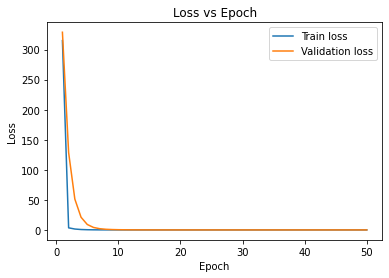

In [ ]:
# STEP 6
# Create a list in a range of 10-20
epoch_list = list(range(1,epoch+1))

#Plot loss for validation and train sets vs epoch
fig = plt.gcf()
plt.plot(epoch_list,MSE_train_list,label = 'Train loss')
plt.plot(epoch_list,MSE_val_list,label = 'Validation loss')
plt.legend(loc = 'upper right')
plt.title("Loss vs Epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()


In [ ]:
#Test accuracy calculation

#function to calculate R square
def rsquare_calculator(pred,actual):
  error = pred-actual
  SSR = np.dot(error,np.transpose(error))
  TSS = np.dot(actual,np.transpose(actual))
  return (1-(SSR[0][0]/TSS[0][0]))

#Add bias column to test set 
X_test_with_bias = np.round(np.append(np.ones([len(X_test_s),1]),X_test_s,1),3)

#Predict train, val and test values from final optimal parameters
train_predictions = np.dot(parameters,np.transpose(X_train_with_bias))
val_predictions = np.dot(parameters,np.transpose(X_val_with_bias))
test_predictions = np.dot(parameters,np.transpose(X_test_with_bias))

#Calculate R square for each of the predicted values
R2_train = rsquare_calculator(train_predictions,np.transpose(Y_train_s))
R2_val = rsquare_calculator(val_predictions,np.transpose(Y_val_s))
R2_test = rsquare_calculator(test_predictions,np.transpose(Y_test_s))

#Print the R2 scores
print("Train R2 = ",round(R2_train,4))
print("Val R2 = ",round(R2_val,4))
print("Test R2 = ",round(R2_test,4))

Train R2 =  0.0874
Val R2 =  0.1854
Test R2 =  0.1308


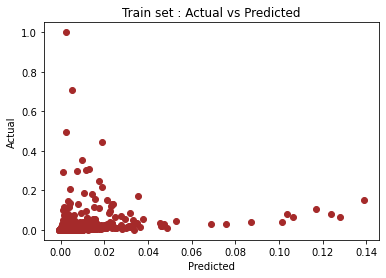

In [ ]:
#Scatter plot of train - actual vs predicted
fig.set_size_inches(20,15)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.scatter(train_predictions,Y_train_s,c = "brown")
plt.title("Train set : Actual vs Predicted")
plt.show()

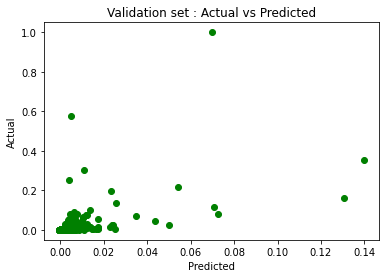

In [ ]:
#Scatter plot of validation - actual vs predicted
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.scatter(val_predictions,Y_val_s,c = "green")
plt.title("Validation set : Actual vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


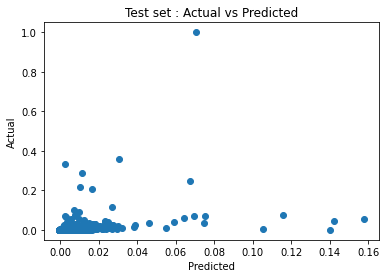

In [ ]:
#Scatter plot of test - actual vs predicted
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.scatter(test_predictions,Y_test_s)
plt.title("Test set : Actual vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()